In [1]:
import os
import cv2
import torch
import argparse
import numpy as np

from PIL import Image
from cotracker.utils.visualizer import Visualizer, read_video_from_path
from cotracker.predictor import CoTrackerPredictor
from einops import rearrange
from matplotlib import pyplot as plt

from point_tracker import PointTracker

In [2]:
video = torch.from_numpy(read_video_from_path("co-tracker/assets/apple.mp4"))


In [3]:
video.shape

torch.Size([48, 719, 1282, 3])

In [11]:
reference_image = video[0]
reference_points = np.array([[400, 300], [450, 350]])

In [12]:
point_tracker = PointTracker(reference_image=reference_image, reference_points=reference_points, checkpoint_path='co-tracker/checkpoints/cotracker_stride_4_wind_8.pth')

In [13]:
tracks = point_tracker.track(video[1:5, ...])

In [14]:
tracks.shape

torch.Size([5, 2, 2])

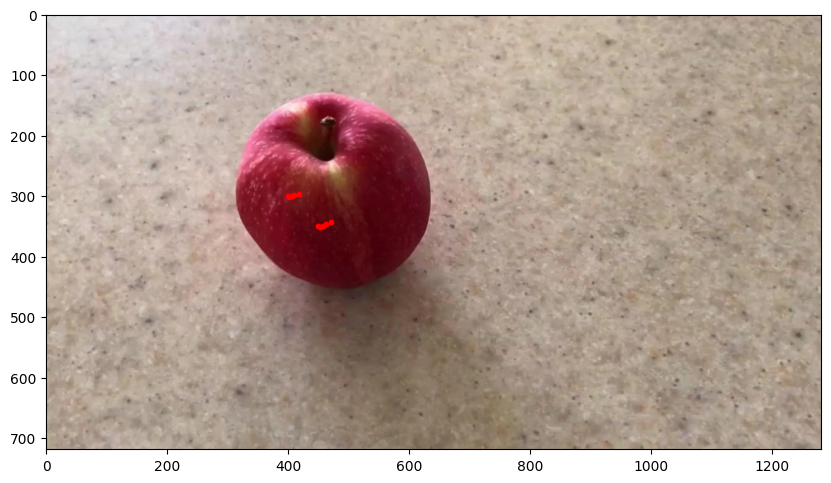

In [15]:
#plot the tracks
plt.figure(figsize=(10, 10))
plt.imshow(reference_image.cpu())
plt.scatter(tracks[:, :, 0], tracks[:,:, 1], c='r', s=10)
plt.show()
